# Alucar - Analisando as vendas

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
alucar = pd.read_csv('alucar.csv')

In [ ]:
print('Quantidade de linhas e colunas:', alucar.shape)

Quantidade de linhas e colunas: (24, 2)


In [ ]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum()) #somando os valores(colunas)

Quantidade de dados nulos: 0


In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes']) #transformando um tipo object em data
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
!pip install seaborn==0.9.0 #instalando o seaborn 
import seaborn as sns
#pegando o matplotlib
%matplotlib inline 
from matplotlib import pyplot as plt

     |████████████████████████████████| 208 kB 8.4 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(sns.__version__)

0.9.0


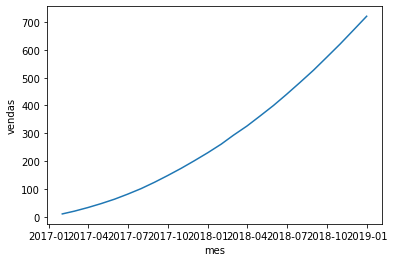

In [ ]:
sns.lineplot(x='mes', y='vendas', data=alucar)

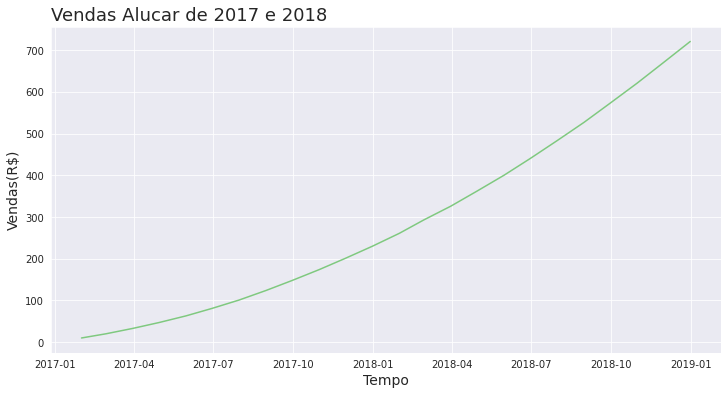

In [ ]:
sns.set_palette('Accent') #linha do gráfico
sns.set_style('darkgrid') #grade do gráfico
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6) #proporção do gráfico
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18) #titulo do gráfico, posição do titulo, tamanho da letra
ax.set_xlabel('Tempo', fontsize=14) #titulo do eixo x, tamanha da letra
ax.set_ylabel('Vendas(R$)', fontsize=14) #titulo do eixo y, tamanha da letra
ax = ax #remover o texto que fica acima

In [ ]:
alucar['aumento'] = alucar['vendas'].diff() #criamos uma coluna nova e fizemos uma subtração de dados anteriores com próximo
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


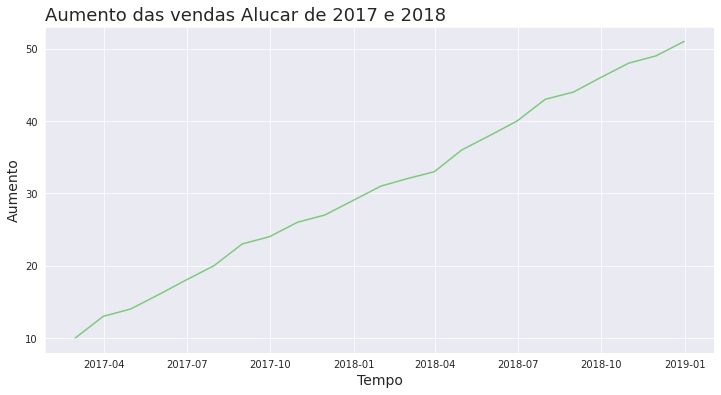

In [ ]:
sns.set_palette('Accent') #linha do gráfico
sns.set_style('darkgrid') #grade do gráfico
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6) #proporção do gráfico
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18) #titulo do gráfico, posição do titulo, tamanho da letra
ax.set_xlabel('Tempo', fontsize=14) #titulo do eixo x, tamanha da letra
ax.set_ylabel('Aumento', fontsize=14) #titulo do eixo y, tamanha da letra
ax = ax #remover o texto que fica acima

In [ ]:
# criando uma função
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent') #linha do gráfico
    sns.set_style('darkgrid') #grade do gráfico
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6) #proporção do gráfico
    ax.set_title(titulo, loc='left', fontsize=18) #titulo do gráfico, posição do titulo, tamanho da letra
    ax.set_xlabel(labelx, fontsize=14) #titulo do eixo x, tamanha da letra
    ax.set_ylabel(labely, fontsize=14) #titulo do eixo y, tamanha da letra
    ax = ax #remover o texto que fica acima

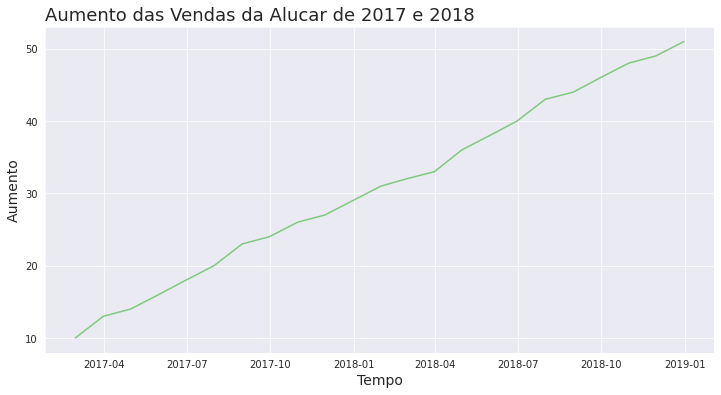

In [ ]:
plotar('Aumento das Vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar )

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


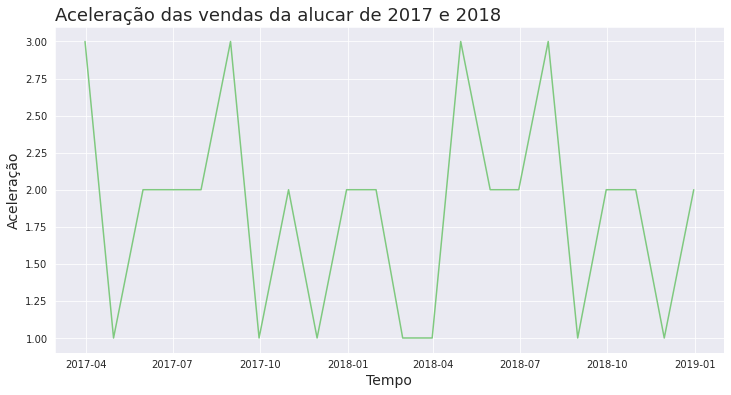

In [ ]:
plotar('Aceleração das vendas da alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

### Gráfico com Técnica de Decomposição

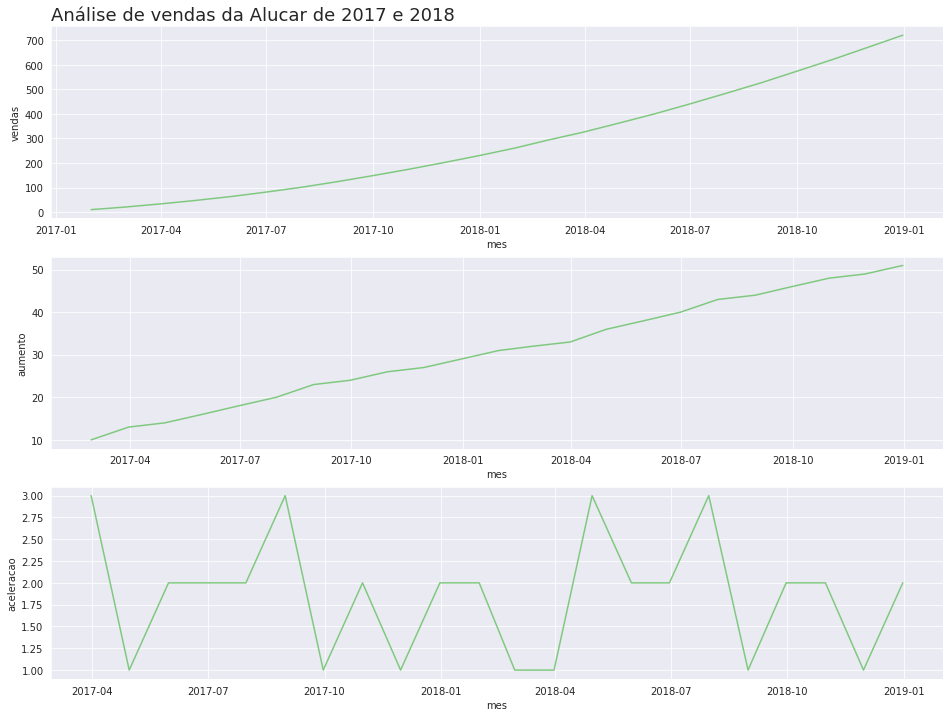

In [ ]:
plt.figure(figsize=(16,12)) #tamanho do gráfico
ax = plt.subplot(3,1,1) #3 partes, 1 divisão de espaço, 1° gráfico
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

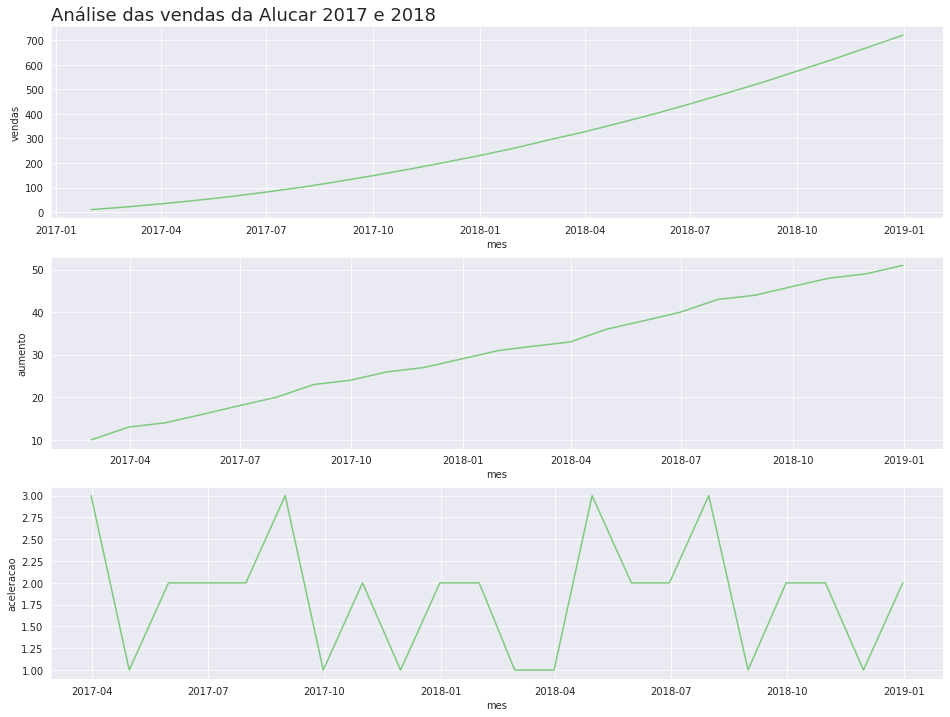

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar 2017 e 2018')

## AutoCorrelação


*   Ele anda entre 1 e -1
### Autocorrelação significa a correlação de valores de uma mesma variável ordenados no tempo.
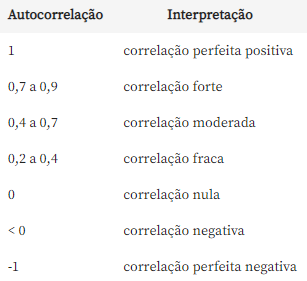



In [ ]:
from pandas.plotting import autocorrelation_plot #importando o gráfico de autocorrelação

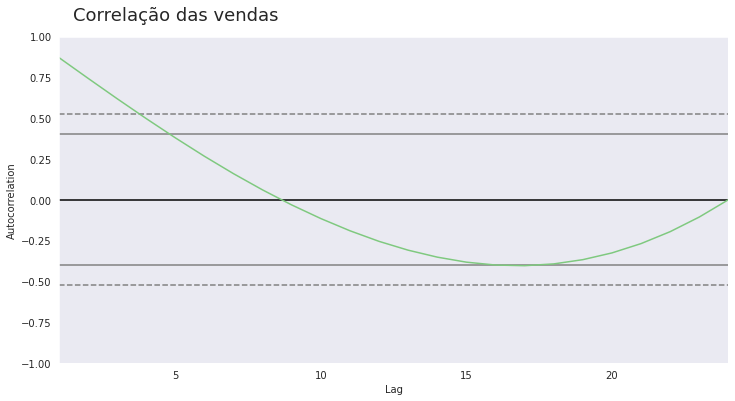

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26,y=0.95) #colocando eixo no titulo
autocorrelation_plot(alucar['vendas'])
ax = ax

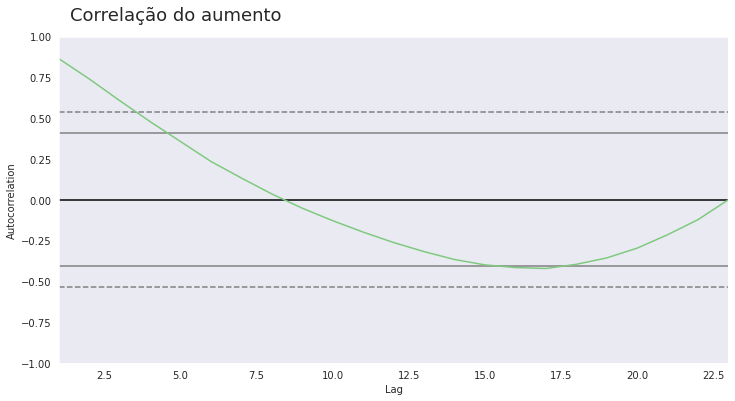

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26,y=0.95)
autocorrelation_plot(alucar['aumento'][1:]) #pegando o index 1, onde ele começa
ax = ax

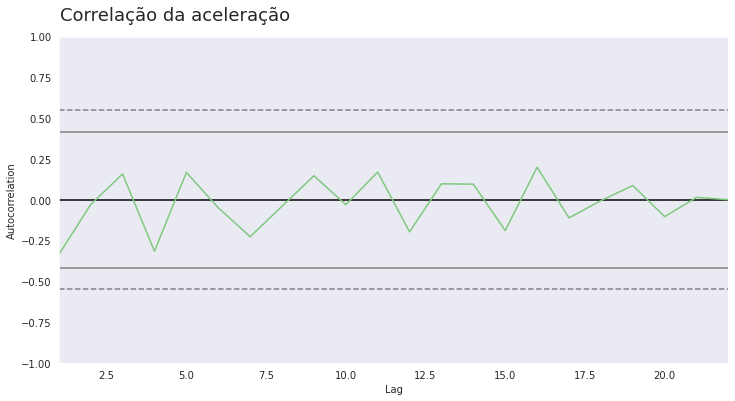

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26,y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])#pegando o index 2, onde ele começa
ax = ax

# Alucar - Analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


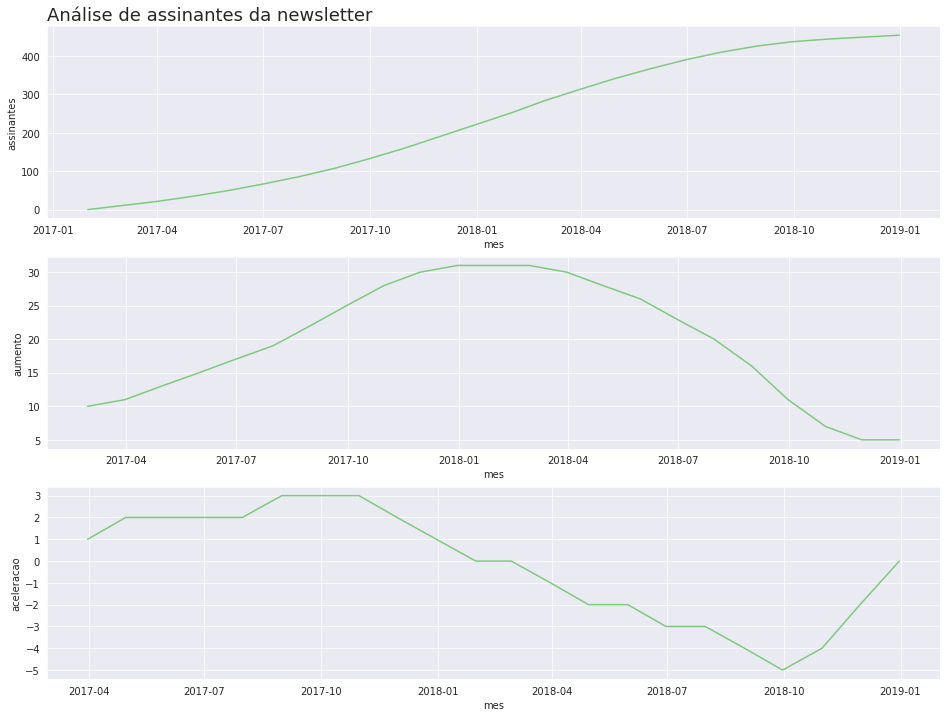

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [ ]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

### **Sazonalidade** é um padrão repetitivo dentro de um determinado período fixo de tempo. Exemplo é no gráfico nos meses 4 e 6

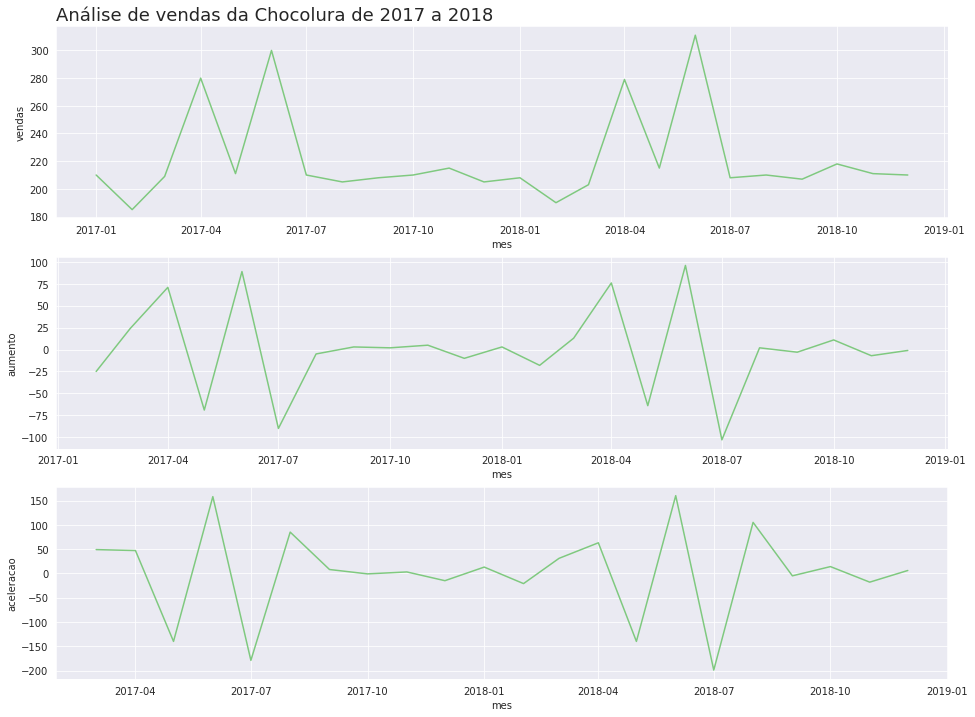

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [ ]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print('Quantidade de linhas e colunas:', vendas_por_dia.shape)
print('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

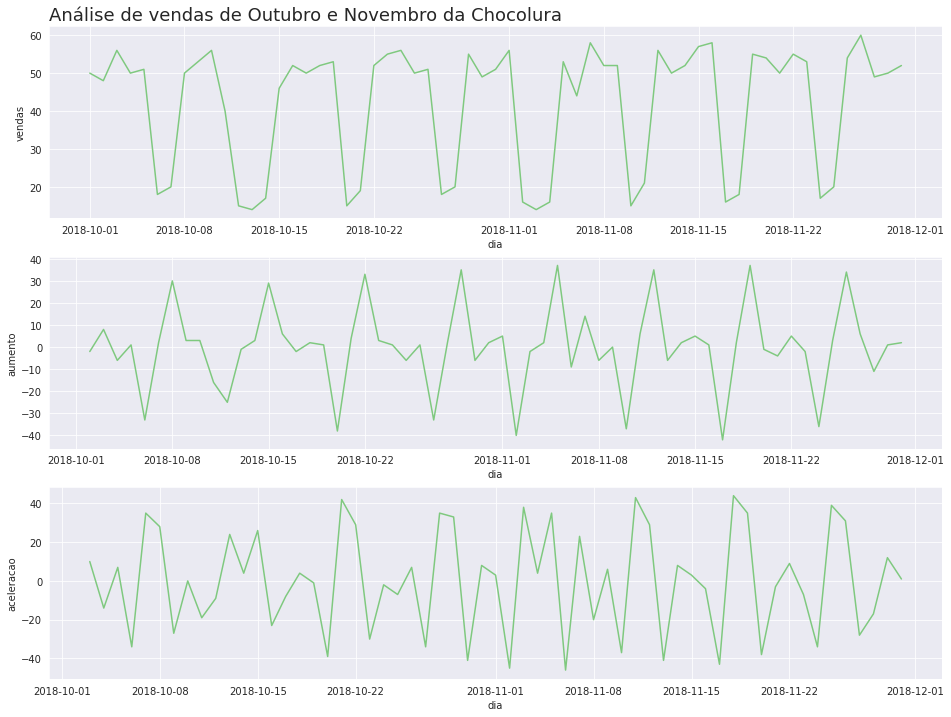

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro da Chocolura')

**Analisando a sazonalidade**

In [ ]:
#data[campo] = data[campo].dt.day_name() -> esse dt.day_name() pega os dias da semana referente a data do index[colunaData]
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name() #acrescentamos uma coluna com os dias da semana

In [ ]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday': 'segunda', 
                   'Tuesday': 'terca', 
                   'Wednesday': 'quarta', 
                   'Thursday': 'quinta', 
                   'Friday': 'sexta', 
                   'Saturday': 'sabado',
                   'Sunday': 'domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos) #mapeando os dias da semana para colocar os traduzidos

In [ ]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,segunda
1,2018-10-02,48,-2.0,NaN,terca
2,2018-10-03,56,8.0,10.0,quarta
3,2018-10-04,50,-6.0,-14.0,quinta
4,2018-10-05,51,1.0,7.0,sexta
5,2018-10-06,18,-33.0,-34.0,sabado
6,2018-10-07,20,2.0,35.0,domingo
7,2018-10-08,50,30.0,28.0,segunda
8,2018-10-09,53,3.0,-27.0,terca
9,2018-10-10,56,3.0,0.0,quarta


**Agrupando os dias**

In [ ]:
#agrupamento por dia da semana, pegando 3 campos e fazendo a media deles
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
domingo,19.0,3.0,31.0
quarta,53.0,1.0,2.0
quinta,51.0,-2.0,-3.0
sabado,16.0,-28.0,-20.0
segunda,52.0,34.0,31.0
sexta,45.0,-7.0,-5.0
terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

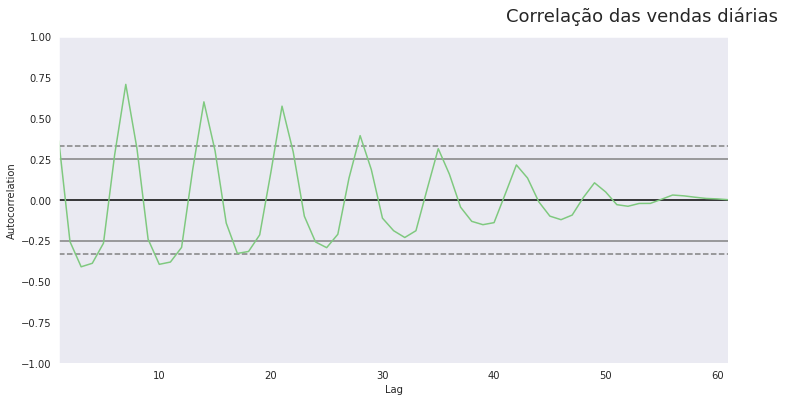

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.8, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

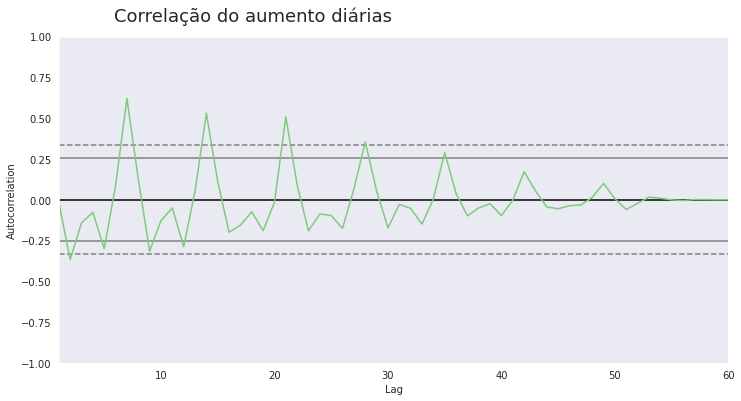

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

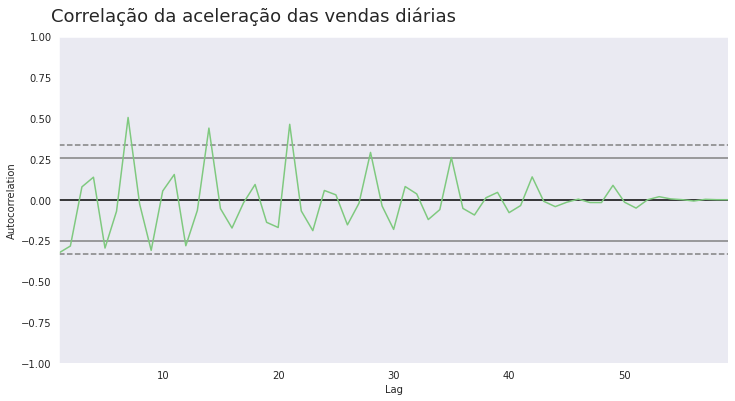

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

# Cafelura - Análise de Vendas

In [ ]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


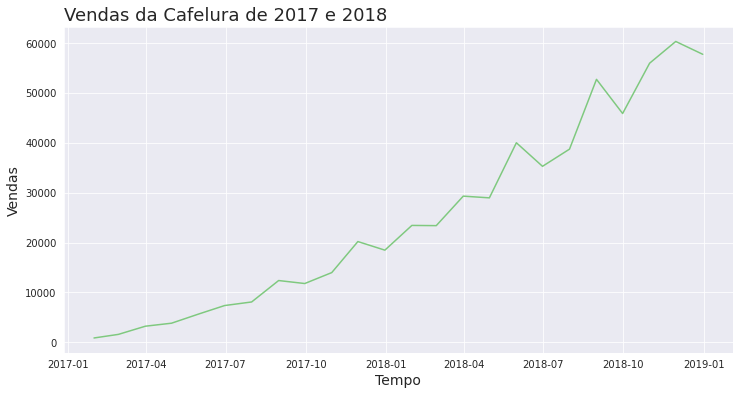

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

## Normalização
### Essa técnica é aplicada em caso de não haver um negócio sazonal

In [ ]:
#fizemos a media da quantidade de vendas feitas nos finais de semana em cada mês
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


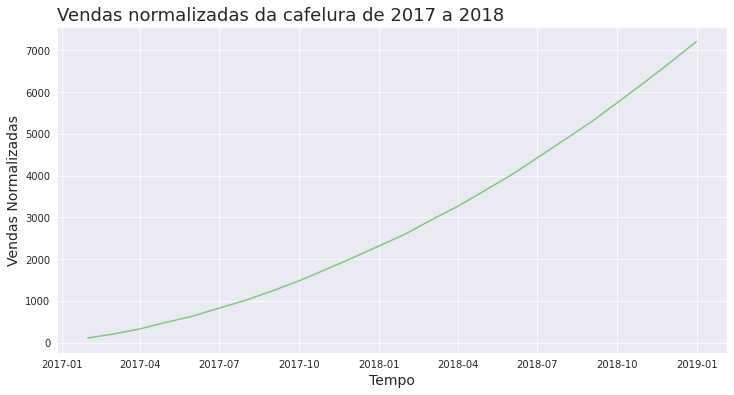

In [ ]:
plotar('Vendas normalizadas da cafelura de 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

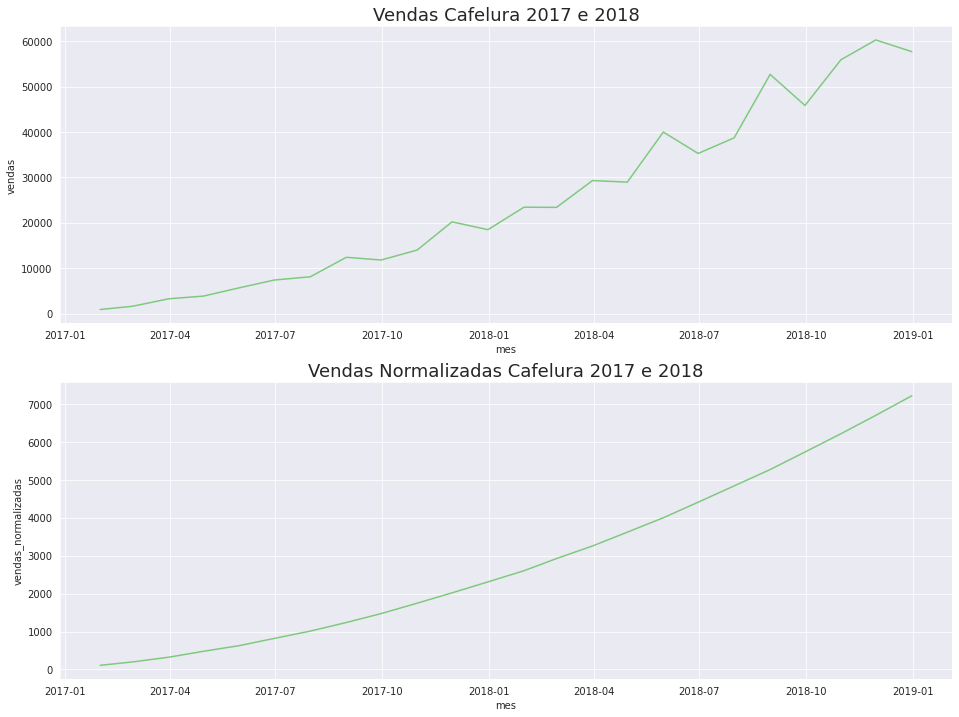

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1) #2  graficos, 1 preenchimento completo, 1 posicao
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

# Statsmodels
###**O Statsmodels é um exemplo de como podemos utilizar uma função para visualizar todas as informações que desejamos.**
**Um ponto importante é que para analisar uma Time Series, tem que ter em mente alguns pontos:**


*   Sazonalidade - mantimento do padrão do dado anterior
*   Tendência - tendência de aumento e queda
*   Ruídos - frequência da linha do gráfico
*   Observação

**Para termos uma noção disso tudo, iremos utilizar o statsmodels para pegar todos esses pontos**





In [ ]:
#importando o statsmodel para conseguir os pontos
from statsmodels.tsa.seasonal import seasonal_decompose

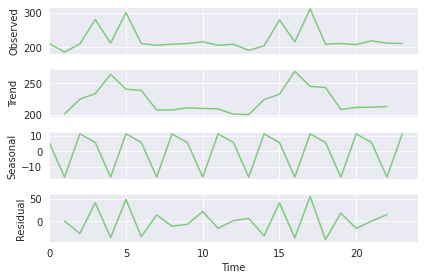

In [ ]:
# variavel = seasonal_decompose([array[campo]], frequencia=int) usamos a frequencia para verificar o modelo melhor para analisar a time series
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)

In [ ]:
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


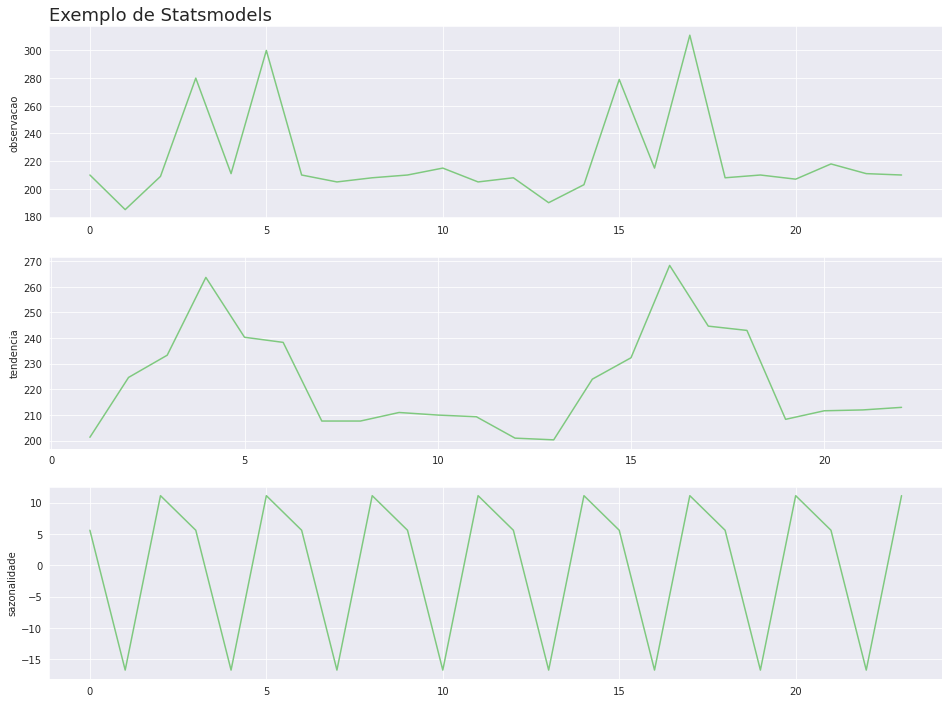

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de vendas

In [ ]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

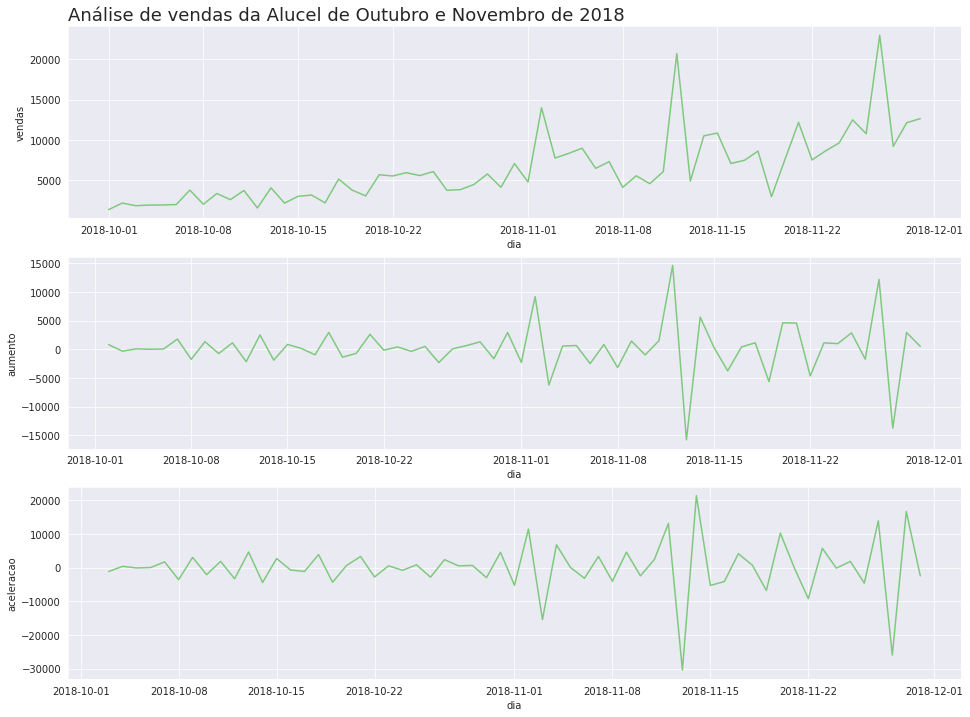

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

## Média Móvel
**Média móvel é uma técnica para reduzir os ruídos do gráfico**

In [ ]:
#utilizamos o rolling para marcar os pontos para minimizar a dispersão da frequência 
alucel['media_movel'] = alucel['vendas'].rolling(7).mean() #o rolling pega num período de 7 pontos

In [ ]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


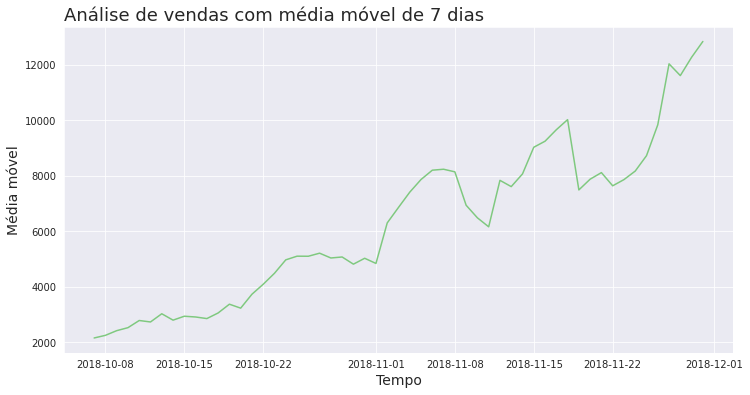

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel', alucel)

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

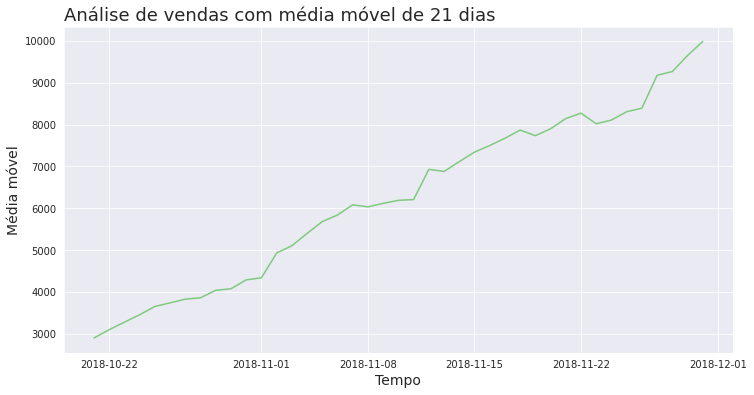

In [ ]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel_21', alucel)

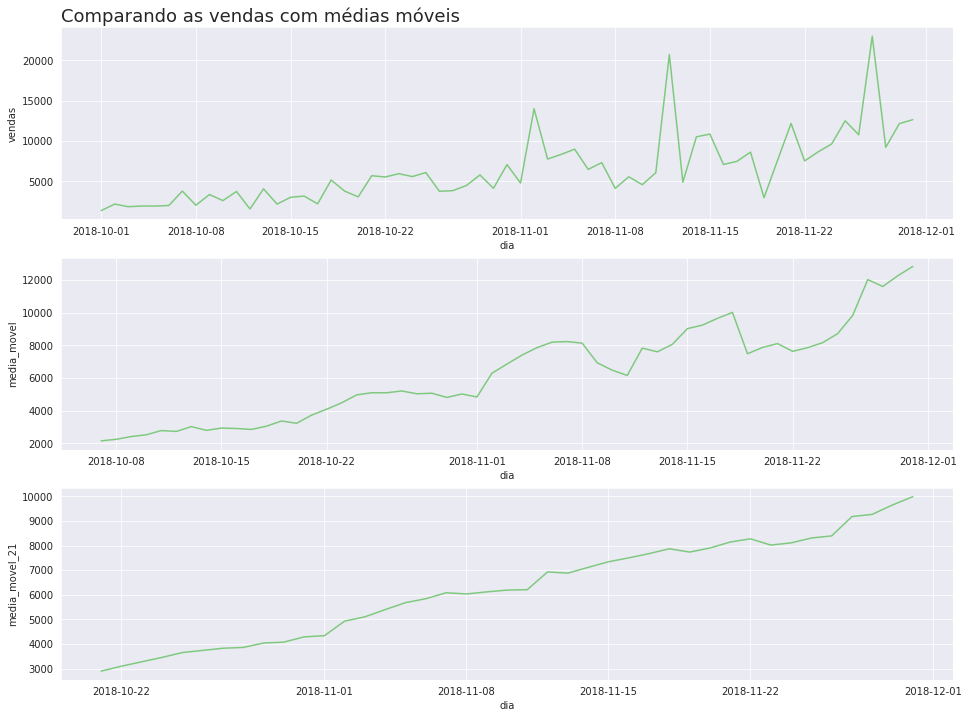

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com médias móveis')